# Imports

In [1]:
import h5py
import os
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import pandas as pd

# Map

In [2]:
def plot_uv_map_uruguay(uv_data):
    """Plots the ozone data, zoomed in on Uruguay."""
    # Handle missing values (replace -9999 or similar with NaN)
    uv_data = np.where(uv_data < 0, np.nan, uv_data)

    # Create latitude and longitude grids
    lons = np.linspace(-180, 180, uv_data.shape[1])  # Longitudes
    lats = np.linspace(-90, 90, uv_data.shape[0])    # Latitudes
    lon_grid, lat_grid = np.meshgrid(lons, lats)
    
    # Create the map
    fig = plt.figure(figsize=(10, 6))
    ax = plt.axes(projection=ccrs.PlateCarree())
    ax.set_title("UV Index", fontsize=14)

    # Add features
    ax.add_feature(cfeature.COASTLINE)
    ax.add_feature(cfeature.BORDERS, linestyle=":")
    ax.add_feature(cfeature.LAND, edgecolor="black", facecolor="lightgray")

    # Zoom into Uruguay
    ax.set_extent([-58, -53, -35, -30], crs=ccrs.PlateCarree())

    # Plot the ozone data
    c = ax.pcolormesh(lon_grid, lat_grid, uv_data, shading="auto", cmap="viridis", transform=ccrs.PlateCarree())
    
    # Add a colorbar
    cb = plt.colorbar(c, orientation="horizontal", pad=0.05)
    cb.set_label("Index level")  # Adjust based on actual units
    
    # Add UV values as text labels
    for i in range(uv_data.shape[0]):
        for j in range(uv_data.shape[1]):
            lon, lat = lon_grid[i, j], lat_grid[i, j]
            if -58 <= lon <= -53 and -35 <= lat <= -30:  # Only label inside Uruguay's zoomed-in area
                if not np.isnan(uv_data[i, j]):  # Avoid NaN values
                    ax.text(lon, lat, f"{uv_data[i, j]:.2f}, {i}, {j}", fontsize=5,
                            ha="center", va="center", color="black",
                            transform=ccrs.PlateCarree())

    plt.show()

In [3]:
def plot_uv_map(uv_data):
    """Plots the ozone data on a global map."""
    # Handle missing values (replace -9999 or similar with NaN)
    uv_data = np.where(uv_data < 0, np.nan, uv_data)

    # Create latitude and longitude grids
    lons = np.linspace(-180, 180, uv_data.shape[1])  # Longitudes
    lats = np.linspace(-90, 90, uv_data.shape[0])    # Latitudes
    lon_grid, lat_grid = np.meshgrid(lons, lats)

    # Create the map
    fig = plt.figure(figsize=(12, 6))
    ax = plt.axes(projection=ccrs.PlateCarree())
    ax.set_title("UV Index", fontsize=14)

    # Add features
    ax.add_feature(cfeature.COASTLINE)
    ax.add_feature(cfeature.BORDERS, linestyle=":")
    ax.add_feature(cfeature.LAND, edgecolor="black", facecolor="lightgray")
    ax.set_global()

    # Plot the ozone data
    c = ax.pcolormesh(lon_grid, lat_grid, uv_data, shading="auto", cmap="viridis", transform=ccrs.PlateCarree())
    
    # Add a colorbar
    cb = plt.colorbar(c, orientation="horizontal", pad=0.05)
    cb.set_label("UV Index")  # Adjust based on actual units

    plt.show()

In [4]:
#for file_name in os.listdir('OMUVBd v003'):
file_name = 'OMI-Aura_L3-OMUVBd_2004m1001_v003-2016m0525t164359.he5'
file_path = f"OMUVBd v003/{file_name}"
dataset_path = "HDFEOS/GRIDS/OMI UVB Product/Data Fields/UVindex"
try:
    # Read the ozone data
    with h5py.File(file_path, "r") as file:
        uv_data = file[dataset_path][:]
        #print(f"Ozone data loaded with shape: {ozone_data.shape}")

except FileNotFoundError:
    print(f"File not found: {file_path}")
except KeyError:
    print(f"Dataset not found: {dataset_path}")
except Exception as e:
    print(f"An error occurred: {e}")

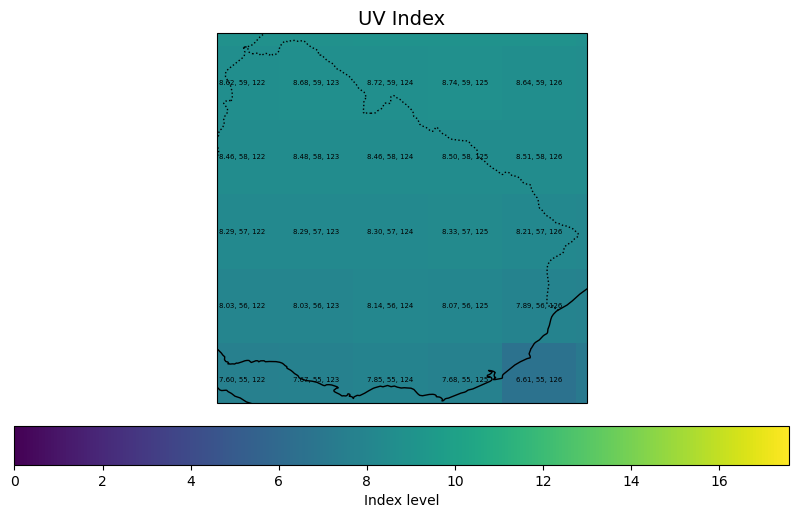

In [5]:
plot_uv_map_uruguay(uv_data)

# Uruguay Data Extract

In [6]:
import h5py
import numpy as np

def extract_uruguay_uv_from_file(file_path):
    """Extracts UV index values for Uruguay from a single .he5 file."""
    
    # Define dataset path for UV index
    uv_path = "HDFEOS/GRIDS/OMI UVB Product/Data Fields/UVindex"

    with h5py.File(file_path, "r") as f:
        # Load UV data
        uv_data = f[uv_path][:]

        # Print dataset shape to verify structure
        print(f"Processing {file_path} - UV Data Shape: {uv_data.shape}")

        # Mask invalid values (-9999 to NaN)
        uv_data = np.where(uv_data < 0, np.nan, uv_data)

        # Extract UV values using correct slicing
        uruguay_uv = uv_data[55:60,122:127]
    
    return uruguay_uv

In [8]:
uruguay_uv_data = {}
folder_path = "OMUVBd v003"
for filename in os.listdir(folder_path):
    if filename.endswith(".he5"):
        file_path = os.path.join(folder_path, filename)
        

        uruguay_uv_data[filename] = extract_uruguay_uv_from_file(file_path)

Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2004m1001_v003-2016m0525t164359.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2004m1002_v003-2016m0525t172244.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2004m1003_v003-2016m0525t180223.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2004m1004_v003-2016m0525t184158.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2004m1005_v003-2016m0525t192148.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2004m1006_v003-2016m0525t200106.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2004m1007_v003-2016m0525t202153.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2004m1008_v003-2016m0525t205849.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2004m1009_v003-2016m0525t213817.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2004

Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2005m0308_v003-2016m0528t015015.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2005m0309_v003-2016m0528t022927.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2005m0310_v003-2016m0528t030841.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2005m0311_v003-2016m0528t034756.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2005m0312_v003-2016m0528t042656.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2005m0313_v003-2016m0528t050557.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2005m0314_v003-2016m0528t054440.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2005m0315_v003-2016m0528t062208.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2005m0316_v003-2016m0528t065643.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2005

Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2005m0801_v003-2016m0531t163808.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2005m0802_v003-2016m0531t165334.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2005m0803_v003-2016m0531t173127.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2005m0804_v003-2016m0531t180946.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2005m0805_v003-2016m0531t184816.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2005m0806_v003-2016m0531t192700.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2005m0807_v003-2016m0531t200539.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2005m0808_v003-2016m0531t204414.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2005m0809_v003-2016m0531t212245.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2005

Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2005m1216_v003-2016m0604t045729.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2005m1217_v003-2016m0604t053413.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2005m1218_v003-2016m0604t061052.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2005m1219_v003-2016m0604t064633.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2005m1220_v003-2016m0604t072141.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2005m1221_v003-2016m0604t075720.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2005m1222_v003-2016m0604t083407.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2005m1223_v003-2016m0604t091057.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2005m1224_v003-2016m0604t094740.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2005

Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2006m0504_v003-2016m0605t120137.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2006m0505_v003-2016m0605t123852.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2006m0506_v003-2016m0605t131533.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2006m0507_v003-2016m0605t135226.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2006m0508_v003-2016m0605t142849.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2006m0509_v003-2016m0605t150540.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2006m0510_v003-2016m0605t154223.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2006m0511_v003-2016m0605t161806.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2006m0512_v003-2016m0605t165449.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2006

Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2006m0924_v003-2016m0609t022957.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2006m0925_v003-2016m0609t030941.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2006m0926_v003-2016m0609t034927.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2006m0927_v003-2016m0609t042910.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2006m0928_v003-2016m0609t050852.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2006m0929_v003-2016m0609t054820.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2006m0930_v003-2016m0609t062611.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2006m1001_v003-2016m0609t070259.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2006m1002_v003-2016m0609t073936.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2006

Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2007m0131_v003-2016m0607t110436.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2007m0201_v003-2016m0607t114253.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2007m0202_v003-2016m0607t122102.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2007m0203_v003-2016m0607t125844.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2007m0204_v003-2016m0607t133723.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2007m0205_v003-2016m0607t141537.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2007m0206_v003-2016m0607t145335.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2007m0207_v003-2016m0607t153151.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2007m0208_v003-2016m0607t160934.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2007

Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2007m0613_v003-2016m0610t185743.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2007m0614_v003-2016m0610t193423.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2007m0615_v003-2016m0610t201110.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2007m0616_v003-2016m0610t204802.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2007m0617_v003-2016m0610t212445.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2007m0618_v003-2016m0610t220134.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2007m0619_v003-2016m0610t223846.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2007m0620_v003-2016m0610t231522.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2007m0621_v003-2016m0610t235212.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2007

Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2007m1017_v003-2016m0613t223326.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2007m1018_v003-2016m0613t231119.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2007m1019_v003-2016m0613t234859.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2007m1020_v003-2016m0614t002645.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2007m1021_v003-2016m0614t010422.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2007m1022_v003-2016m0614t014208.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2007m1023_v003-2016m0614t021927.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2007m1024_v003-2016m0614t025702.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2007m1025_v003-2016m0614t033423.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2007

Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2008m0301_v003-2016m0628t203851.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2008m0302_v003-2016m0628t211557.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2008m0303_v003-2016m0628t215316.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2008m0304_v003-2016m0628t223052.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2008m0305_v003-2016m0628t230853.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2008m0306_v003-2016m0628t234621.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2008m0307_v003-2016m0629t002343.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2008m0308_v003-2016m0629t010058.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2008m0309_v003-2016m0629t013846.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2008

Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2008m0718_v003-2016m0702t032650.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2008m0719_v003-2016m0702t040043.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2008m0720_v003-2016m0702t043500.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2008m0721_v003-2016m0702t050913.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2008m0722_v003-2016m0702t054323.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2008m0723_v003-2016m0702t061725.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2008m0724_v003-2016m0702t063607.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2008m0725_v003-2016m0702t065017.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2008m0726_v003-2016m0702t072342.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2008

Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2008m1202_v003-2016m0705t090348.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2008m1203_v003-2016m0705t093619.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2008m1204_v003-2016m0705t100748.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2008m1205_v003-2016m0705t103912.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2008m1206_v003-2016m0705t111033.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2008m1207_v003-2016m0705t114124.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2008m1208_v003-2016m0705t121226.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2008m1209_v003-2016m0705t124241.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2008m1210_v003-2016m0705t131402.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2008

Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2009m0419_v003-2016m0629t105754.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2009m0420_v003-2016m0629t112445.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2009m0421_v003-2016m0629t115115.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2009m0422_v003-2016m0629t121515.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2009m0423_v003-2016m0629t124041.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2009m0424_v003-2016m0629t130603.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2009m0425_v003-2016m0629t133107.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2009m0426_v003-2016m0629t135547.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2009m0427_v003-2016m0629t142111.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2009

Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2009m0910_v003-2016m0701t200751.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2009m0911_v003-2016m0701t203225.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2009m0912_v003-2016m0701t205637.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2009m0913_v003-2016m0701t211042.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2009m0914_v003-2016m0701t212047.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2009m0915_v003-2016m0701t214452.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2009m0916_v003-2016m0701t220930.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2009m0917_v003-2016m0701t223357.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2009m0918_v003-2016m0701t225831.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2009

Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2010m0201_v003-2016m0704t193523.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2010m0202_v003-2016m0704t195637.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2010m0203_v003-2016m0704t201811.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2010m0204_v003-2016m0704t203951.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2010m0205_v003-2016m0704t210122.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2010m0206_v003-2016m0704t212253.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2010m0207_v003-2016m0704t214412.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2010m0208_v003-2016m0704t220529.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2010m0209_v003-2016m0704t222725.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2010

Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2010m0616_v003-2016m0706t181132.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2010m0617_v003-2016m0706t183224.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2010m0618_v003-2016m0706t185300.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2010m0619_v003-2016m0706t191349.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2010m0620_v003-2016m0706t193444.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2010m0621_v003-2016m0706t195525.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2010m0622_v003-2016m0706t201629.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2010m0623_v003-2016m0706t203704.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2010m0624_v003-2016m0706t205735.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2010

Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2010m1101_v003-2016m0708t183823.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2010m1102_v003-2016m0708t190015.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2010m1103_v003-2016m0708t191229.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2010m1104_v003-2016m0708t192143.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2010m1105_v003-2016m0708t194300.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2010m1106_v003-2016m0708t200449.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2010m1107_v003-2016m0708t202648.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2010m1108_v003-2016m0708t204824.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2010m1109_v003-2016m0708t211002.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2010

Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2011m0322_v003-2016m0707t153850.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2011m0323_v003-2016m0707t160045.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2011m0324_v003-2016m0707t162256.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2011m0325_v003-2016m0707t164512.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2011m0326_v003-2016m0707t170739.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2011m0327_v003-2016m0707t172930.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2011m0328_v003-2016m0707t175100.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2011m0329_v003-2016m0707t181303.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2011m0330_v003-2016m0707t183458.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2011

Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2011m0823_v003-2016m0709t175726.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2011m0824_v003-2016m0709t181739.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2011m0825_v003-2016m0709t183753.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2011m0826_v003-2016m0709t185758.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2011m0827_v003-2016m0709t191815.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2011m0828_v003-2016m0709t193834.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2011m0829_v003-2016m0709t195901.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2011m0830_v003-2016m0709t201930.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2011m0831_v003-2016m0709t203954.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2011

Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2012m0112_v003-2016m0711t210406.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2012m0113_v003-2016m0711t212934.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2012m0114_v003-2016m0711t215455.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2012m0115_v003-2016m0711t222039.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2012m0116_v003-2016m0711t224627.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2012m0117_v003-2016m0711t231216.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2012m0118_v003-2016m0711t233718.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2012m0119_v003-2016m0712t000306.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2012m0120_v003-2016m0712t002902.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2012

Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2012m0526_v003-2016m0714t054903.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2012m0527_v003-2016m0714t061309.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2012m0528_v003-2016m0714t063709.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2012m0529_v003-2016m0714t070000.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2012m0530_v003-2016m0714t072329.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2012m0531_v003-2016m0714t074715.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2012m0601_v003-2016m0714t080128.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2012m0602_v003-2016m0714t081208.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2012m0603_v003-2016m0714t083635.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2012

Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2012m1012_v003-2016m0716t142959.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2012m1013_v003-2016m0716t145549.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2012m1014_v003-2016m0716t152141.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2012m1015_v003-2016m0716t154725.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2012m1016_v003-2016m0716t161307.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2012m1017_v003-2016m0716t163800.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2012m1018_v003-2016m0716t170339.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2012m1019_v003-2016m0716t172901.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2012m1020_v003-2016m0716t175426.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2012

Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2013m0309_v003-2016m0712t192527.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2013m0310_v003-2016m0712t195119.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2013m0311_v003-2016m0712t201707.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2013m0312_v003-2016m0712t204255.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2013m0313_v003-2016m0712t210842.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2013m0314_v003-2016m0712t213425.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2013m0315_v003-2016m0712t220008.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2013m0316_v003-2016m0712t221447.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2013m0317_v003-2016m0712t222544.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2013

Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2013m0718_v003-2016m0714t231450.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2013m0719_v003-2016m0714t233900.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2013m0720_v003-2016m0715t000344.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2013m0721_v003-2016m0715t002824.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2013m0722_v003-2016m0715t004235.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2013m0723_v003-2016m0715t005257.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2013m0724_v003-2016m0715t011733.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2013m0725_v003-2016m0715t014229.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2013m0726_v003-2016m0715t020723.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2013

Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2013m1217_v003-2016m0717t124004.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2013m1218_v003-2016m0717t130359.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2013m1219_v003-2016m0717t132750.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2013m1220_v003-2016m0717t135137.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2013m1221_v003-2016m0717t141523.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2013m1222_v003-2016m0717t143904.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2013m1223_v003-2016m0717t150302.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2013m1224_v003-2016m0717t152635.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2013m1225_v003-2016m0717t155020.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2013

Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2014m0504_v003-2016m0806t124033.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2014m0505_v003-2016m0806t130523.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2014m0506_v003-2016m0806t131930.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2014m0507_v003-2016m0806t132956.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2014m0508_v003-2016m0806t135431.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2014m0509_v003-2016m0806t141926.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2014m0510_v003-2016m0806t144357.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2014m0511_v003-2016m0806t150855.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2014m0512_v003-2016m0806t153333.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2014

Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2014m1001_v003-2016m0808t233713.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2014m1002_v003-2016m0809t000125.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2014m1003_v003-2016m0809t002541.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2014m1004_v003-2016m0809t004957.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2014m1005_v003-2016m0809t011413.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2014m1006_v003-2016m0809t013816.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2014m1007_v003-2016m0809t020229.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2014m1008_v003-2016m0809t022623.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2014m1009_v003-2016m0809t025029.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2014

Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2015m0219_v003-2016m0805t035253.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2015m0220_v003-2016m0805t041626.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2015m0221_v003-2016m0805t044013.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2015m0222_v003-2016m0805t050356.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2015m0223_v003-2016m0805t052742.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2015m0224_v003-2016m0805t055210.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2015m0225_v003-2016m0805t061600.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2015m0226_v003-2016m0805t063953.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2015m0227_v003-2016m0805t070340.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2015

Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2015m0702_v003-2016m0807t055258.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2015m0703_v003-2016m0807t061551.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2015m0704_v003-2016m0807t063838.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2015m0705_v003-2016m0807t070108.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2015m0706_v003-2016m0807t072401.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2015m0707_v003-2016m0807t074632.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2015m0708_v003-2016m0807t080947.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2015m0709_v003-2016m0807t083237.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2015m0710_v003-2016m0807t085540.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2015

Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2015m1106_v003-2016m0809t060016.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2015m1107_v003-2016m0809t062304.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2015m1108_v003-2016m0809t064545.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2015m1109_v003-2016m0809t070834.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2015m1110_v003-2016m0809t073112.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2015m1111_v003-2016m0809t075357.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2015m1112_v003-2016m0809t081634.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2015m1113_v003-2016m0809t083907.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2015m1114_v003-2016m0809t090143.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2015

Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2016m0328_v003-2016m0818t152226.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2016m0329_v003-2016m0818t154147.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2016m0330_v003-2016m0818t160126.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2016m0331_v003-2016m0818t162119.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2016m0401_v003-2016m0818t164126.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2016m0402_v003-2016m0818t170135.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2016m0403_v003-2016m0818t172145.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2016m0404_v003-2016m0818t174128.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2016m0405_v003-2016m0818t180057.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2016

Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2016m0822_v003-2016m0826t093001.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2016m0823_v003-2016m0827t093002.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2016m0824_v003-2016m0828t093001.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2016m0825_v003-2016m0829t093002.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2016m0826_v003-2016m0830t093001.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2016m0827_v003-2016m0831t093001.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2016m0828_v003-2016m0901t093002.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2016m0829_v003-2016m0902t093001.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2016m0830_v003-2016m0903t093001.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2016

Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2017m0105_v003-2017m0109t093001.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2017m0106_v003-2017m0110t093001.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2017m0107_v003-2017m0112t110959.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2017m0108_v003-2017m0112t113017.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2017m0109_v003-2017m0113t093002.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2017m0110_v003-2017m0114t093001.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2017m0111_v003-2017m0115t093001.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2017m0112_v003-2017m0116t093001.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2017m0113_v003-2017m0117t093001.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2017

Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2017m0531_v003-2017m0604t093001.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2017m0601_v003-2017m0605t093001.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2017m0602_v003-2017m0606t093001.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2017m0603_v003-2017m0607t093002.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2017m0604_v003-2017m0608t093002.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2017m0605_v003-2017m0609t093001.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2017m0606_v003-2017m0610t093002.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2017m0607_v003-2017m0611t093001.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2017m0608_v003-2017m0612t093001.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2017

Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2017m1018_v003-2017m1022t093001.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2017m1019_v003-2017m1023t093001.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2017m1020_v003-2017m1024t093001.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2017m1021_v003-2017m1025t093002.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2017m1022_v003-2017m1026t093001.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2017m1023_v003-2017m1027t093001.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2017m1024_v003-2017m1028t093001.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2017m1025_v003-2017m1029t093001.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2017m1026_v003-2017m1030t093001.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2017

Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2018m0305_v003-2018m0314t101908.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2018m0306_v003-2018m0314t103608.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2018m0307_v003-2018m0314t105255.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2018m0308_v003-2018m0312t093001.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2018m0309_v003-2018m0313t093001.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2018m0310_v003-2018m0314t093001.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2018m0311_v003-2018m0315t093001.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2018m0312_v003-2018m0316t093001.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2018m0313_v003-2018m0317t093001.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2018

Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2018m0729_v003-2018m0802t093001.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2018m0730_v003-2018m0816t122735.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2018m0731_v003-2018m0816t124626.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2018m0801_v003-2018m0816t130506.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2018m0802_v003-2018m0816t132421.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2018m0803_v003-2018m0816t135146.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2018m0804_v003-2018m0816t141127.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2018m0805_v003-2018m0816t143049.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2018m0806_v003-2018m0816t145047.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2018

Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2018m1210_v003-2018m1214t093001.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2018m1211_v003-2018m1215t093001.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2018m1212_v003-2018m1216t093001.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2018m1213_v003-2018m1217t093002.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2018m1214_v003-2018m1218t093001.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2018m1215_v003-2018m1219t093001.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2018m1216_v003-2018m1220t093001.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2018m1217_v003-2018m1221t093001.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2018m1218_v003-2018m1222t093001.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2018

Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2019m0425_v003-2019m0429t093001.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2019m0426_v003-2019m0430t093002.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2019m0427_v003-2019m0501t093001.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2019m0428_v003-2019m0502t093001.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2019m0429_v003-2019m0503t093001.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2019m0430_v003-2019m0504t093001.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2019m0501_v003-2019m0505t093001.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2019m0502_v003-2019m0506t093002.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2019m0503_v003-2019m0507t093001.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2019

Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2019m0914_v003-2019m0918t093001.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2019m0915_v003-2019m0919t093001.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2019m0916_v003-2019m0920t093001.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2019m0917_v003-2019m0921t093001.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2019m0918_v003-2019m0922t093001.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2019m0919_v003-2019m0923t093001.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2019m0920_v003-2019m0924t093001.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2019m0921_v003-2019m0925t093002.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2019m0922_v003-2019m0926t093001.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2019

Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2020m0118_v003-2020m0122t093001.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2020m0119_v003-2020m0123t093001.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2020m0120_v003-2020m0124t093002.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2020m0121_v003-2020m0125t093001.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2020m0122_v003-2020m0126t093001.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2020m0123_v003-2020m0127t093001.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2020m0124_v003-2020m0128t093002.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2020m0125_v003-2020m0129t093001.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2020m0126_v003-2020m0130t093001.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2020

Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2020m0529_v003-2020m0602t093001.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2020m0530_v003-2020m0603t093001.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2020m0531_v003-2020m0604t093001.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2020m0601_v003-2020m0605t093001.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2020m0602_v003-2020m0606t093001.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2020m0603_v003-2020m0607t093001.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2020m0604_v003-2020m0608t093001.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2020m0605_v003-2020m0609t093001.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2020m0606_v003-2020m0610t093001.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2020

Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2020m1020_v003-2020m1024t093002.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2020m1021_v003-2020m1025t093001.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2020m1022_v003-2020m1026t093001.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2020m1023_v003-2020m1027t093002.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2020m1024_v003-2020m1028t093002.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2020m1025_v003-2020m1029t093001.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2020m1026_v003-2020m1030t093002.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2020m1027_v003-2020m1031t093001.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2020m1028_v003-2020m1101t093001.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2020

Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2021m0305_v003-2021m0309t093001.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2021m0306_v003-2021m0310t093001.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2021m0307_v003-2021m0311t093002.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2021m0308_v003-2021m0312t093001.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2021m0309_v003-2021m0313t093002.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2021m0310_v003-2021m0314t093001.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2021m0311_v003-2021m0315t093001.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2021m0312_v003-2021m0316t093001.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2021m0313_v003-2021m0317t093001.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2021

Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2021m0725_v003-2021m0729t093001.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2021m0726_v003-2021m0730t093001.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2021m0727_v003-2021m0731t093002.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2021m0728_v003-2021m0801t093001.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2021m0729_v003-2021m0802t093002.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2021m0730_v003-2021m0803t093002.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2021m0731_v003-2021m0804t093001.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2021m0801_v003-2021m0805t093001.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2021m0802_v003-2021m0806t093001.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2021

Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2021m1205_v003-2021m1209t093001.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2021m1206_v003-2021m1210t093001.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2021m1207_v003-2021m1211t093001.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2021m1208_v003-2021m1212t093001.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2021m1209_v003-2021m1213t093001.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2021m1210_v003-2021m1214t093001.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2021m1211_v003-2021m1215t093001.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2021m1212_v003-2021m1216t093002.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2021m1213_v003-2021m1217t093001.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2021

Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2022m0504_v003-2022m0508t093001.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2022m0505_v003-2022m0509t093001.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2022m0506_v003-2022m0510t093001.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2022m0507_v003-2022m0511t093001.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2022m0508_v003-2022m0512t093001.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2022m0509_v003-2022m0513t093001.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2022m0510_v003-2022m0514t093001.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2022m0511_v003-2022m0515t093001.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2022m0512_v003-2022m0516t093001.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2022

Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2022m0908_v003-2022m0912t093002.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2022m0909_v003-2022m0913t093001.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2022m0910_v003-2022m0914t093001.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2022m0911_v003-2022m0915t093001.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2022m0912_v003-2022m0916t093002.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2022m0913_v003-2022m0917t093002.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2022m0914_v003-2022m0918t093001.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2022m0915_v003-2022m0919t093001.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2022m0916_v003-2022m0920t093001.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2022

Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2023m0119_v003-2023m0123t093001.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2023m0120_v003-2023m0124t093001.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2023m0121_v003-2023m0125t093001.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2023m0122_v003-2023m0126t093002.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2023m0123_v003-2023m0127t093002.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2023m0124_v003-2023m0128t093001.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2023m0125_v003-2023m0129t093001.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2023m0126_v003-2023m0130t093001.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2023m0127_v003-2023m0131t093001.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2023

Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2023m0529_v003-2023m1012t155604.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2023m0530_v003-2023m1012t160748.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2023m0531_v003-2023m1012t161931.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2023m0601_v003-2023m1013t102642.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2023m0602_v003-2023m1013t103951.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2023m0603_v003-2023m1013t105258.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2023m0604_v003-2023m1013t110552.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2023m0605_v003-2023m1013t111839.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2023m0606_v003-2023m1013t113131.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2023

Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2023m1003_v003-2023m1014t141705.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2023m1004_v003-2023m1014t142945.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2023m1005_v003-2023m1014t144229.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2023m1006_v003-2023m1014t145708.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2023m1007_v003-2023m1014t151149.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2023m1008_v003-2023m1014t152429.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2023m1009_v003-2023m1014t153714.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2023m1010_v003-2023m1016t101529.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2023m1011_v003-2023m1016t102926.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2023

Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2024m0225_v003-2024m0229t090001.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2024m0226_v003-2024m0301t090001.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2024m0227_v003-2024m0302t090001.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2024m0228_v003-2024m0303t090002.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2024m0229_v003-2024m0304t090001.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2024m0301_v003-2024m0305t090002.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2024m0302_v003-2024m0306t090001.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2024m0303_v003-2024m0307t090001.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2024m0304_v003-2024m0308t090001.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2024

Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2024m0716_v003-2024m0720t090001.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2024m0717_v003-2024m0721t090002.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2024m0718_v003-2024m0722t090001.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2024m0719_v003-2024m0723t090001.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2024m0720_v003-2024m0724t090002.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2024m0721_v003-2024m0725t090001.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2024m0722_v003-2024m0726t090001.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2024m0723_v003-2024m0727t090001.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2024m0724_v003-2024m0728t090001.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2024

Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2024m1122_v003-2024m1126t090001.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2024m1123_v003-2024m1127t090001.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2024m1124_v003-2024m1128t090001.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2024m1125_v003-2024m1129t090002.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2024m1126_v003-2024m1130t090001.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2024m1127_v003-2024m1201t090001.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2024m1128_v003-2024m1202t090001.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2024m1129_v003-2024m1203t090001.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2024m1130_v003-2024m1204t090001.he5 - UV Data Shape: (180, 360)
Processing OMUVBd v003\OMI-Aura_L3-OMUVBd_2024

In [9]:
x = []
X = []

for value in uruguay_uv_data.keys():
    s_i = 55
    for i in range(uruguay_uv_data[value].shape[0]):
        s_j = 122
        for j in range(uruguay_uv_data[value].shape[1]):
            x = []
            x.append(value)
            x.append(f"{value[19:23]}-{value[24:26]}-{value[26:28]}")
            x.append(s_i)
            x.append(s_j)
            x.append(uruguay_uv_data[value][i,j])
            
            X.append(x)
            s_j = s_j + 1
        s_i = s_i + 1
        
X = np.asarray(X)

In [10]:
pd.DataFrame(X,columns = ['File_Name','Date','Latitude', 'Longitude', 'UV_Index']).to_excel('OMUVBd v003/OMUVBd v003 data.xlsx')